In [1]:
#First import neo, numpy and pyplot
import neo
import numpy as np
from matplotlib import pyplot as plt

C:\Users\ludov\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Open the file with neo 
my_file = neo.io.AxographIO(r"C:\Users\ludov\Downloads\c2, 28-2-2018 006.axgd")

#Create a block object
bl = my_file.read_block()

In [3]:
#Create 2 lists to collect time and signal vectors 
TIME, REC = [],[]

#This loop will append one by one each episode of the recording in our lists
for episode in bl.segments :
    time = episode.analogsignals[0].times #The time vector
    TIME.append(time)
    
    rec = episode.analogsignals[0].magnitude #The signal vector    
    leak = np.mean(rec[0:100]) #The offest of the trace
    REC.append(rec-leak) #We extract the signal minus the offset
    
print (REC)

[array([[-1.81875e-12],
       [-2.75625e-12],
       [-1.50625e-12],
       ...,
       [ 9.93750e-13],
       [-2.56250e-13],
       [-1.50625e-12]]), array([[2.0750e-12],
       [2.7000e-12],
       [2.3875e-12],
       ...,
       [1.7625e-12],
       [1.1375e-12],
       [5.1250e-13]]), array([[-1.36875e-12],
       [ 1.93750e-13],
       [ 1.93750e-13],
       ...,
       [ 8.31875e-12],
       [ 7.69375e-12],
       [ 5.81875e-12]]), array([[-6.9625e-12],
       [-8.5250e-12],
       [-6.6500e-12],
       ...,
       [ 2.1000e-12],
       [ 8.5000e-13],
       [ 1.7875e-12]]), array([[-2.2875e-12],
       [-1.6625e-12],
       [-4.1250e-13],
       ...,
       [ 1.7750e-12],
       [ 3.0250e-12],
       [ 2.7125e-12]]), array([[ 1.425e-12],
       [-1.375e-13],
       [ 1.750e-13],
       ...,
       [ 8.000e-13],
       [ 2.050e-12],
       [ 1.425e-12]]), array([[-3.83125e-12],
       [-1.95625e-12],
       [-3.93750e-13],
       ...,
       [-2.89375e-12],
       [-1.33125e-1

In [4]:
#Let's compute the average recording 
AVERAGE = np.mean(REC,axis = 0)

#Now it's time the show everything
plt.figure()

#Let's display each trace superimposed
for i in range(len(REC)):
    plt.plot(TIME[i],REC[i],color = '0.5', alpha = 0.4)

#And the the average
plt.plot(TIME[0],AVERAGE,color='blue')

In [5]:
#To find the PSC amplitude, we first have to set our time window for measurement
#Here between 501 and 540 ms 
start = np.ravel(np.where(TIME[0] >= 0.501))[0]
stop = np.ravel(np.where(TIME[0] >= 0.540))[0]

In [6]:
#Now we get the minimum value in the window (=max amp)
#And the index of the value (ie where it is in the global vector)
MIN = np.min(AVERAGE[start:stop])
MIN_idx = TIME[0][np.ravel(np.where(AVERAGE == MIN))[0]]

print (MIN)

-2.0047499999999995e-10


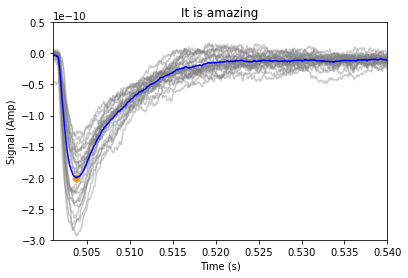

In [7]:
#And we plot it
plt.scatter(MIN_idx,MIN, s=50, color='orange')

#Add a few graphic element on the plot
plt.xlabel('Time (s)')
plt.ylabel('Signal (Amp)')
plt.title('It is amazing')

#Limits the plot borders for better view
plt.xlim(TIME[0][start],TIME[0][stop])
plt.ylim(-3e-10,0.5e-10)
plt.show()